In [1]:
# Exercise: 2-1
# Create a variable phrase containing a list of words. Experiment with the operations described in this chapter,
# including addition, multiplication, indexing, slicing, and sorting.

phrase = ["one", "two", "three", "four"]

sorted(phrase)

['four', 'one', 'three', 'two']

In [2]:
phrase[1:2]

['two']

In [3]:
phrase[0]

'one'

In [4]:
# Exercise: 2-2
# Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many
# word types?

import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
persuasion = nltk.corpus.gutenberg.words('austen-persuasion.txt')
len(persuasion)

98171

In [6]:
from nltk.corpus import gutenberg
words = gutenberg.words('austen-persuasion.txt')
num_tokens = len([w for w in words if w.isalpha()])

In [7]:
num_tokens

84121

In [8]:
num_wt = len(set([w for w in words if w.isalpha()]))
num_wt

6036

In [9]:
# Exercise: 2-3
# Use the Brown Corpus reader nltk.corpus.brown.words() or the Web Text Corpus reader nltk.corpus.webtext.words() to
# access some sample text in two different genres.

from nltk.corpus import brown
import random

random_category = random.choice(brown.categories())
random_place = random.randint(0, len(brown.sents(categories = random_category)) - 5)

text = brown.sents(categories = random_category)[random_place:random_place + 5]

print(text, end = '')

[['Also', 'noted', 'are', 'the', 'marriages', 'of', 'Elizabeth', 'Browning', ',', 'daughter', 'of', 'the', 'George', 'L.', 'Brownings', ',', 'to', 'Austin', 'C.', 'Smith', 'Jr.', ';', ';'], ['Cynthia', 'Flower', ',', 'daughter', 'of', 'the', 'Ludlow', 'Flowers', 'Jr.', ',', 'to', 'Todd', 'Huntington', ',', 'son', 'of', 'the', 'David', 'Huntingtons', '.'], ['Pasadena', 'listings'], ['Listed', 'as', 'newly', 'wed', 'in', 'the', 'Pasadena', 'section', 'of', 'the', 'new', 'book', 'are', 'Mr.', 'and', 'Mrs.', 'Samuel', 'Moody', 'Haskins', '3', '.'], ['She', 'is', 'the', 'former', 'Judy', 'Chapman', ',', 'daughter', 'of', 'John', 'S.', 'Chapman', 'of', 'this', 'city', '.']]

In [10]:
print([w for w in text], end = '')

[['Also', 'noted', 'are', 'the', 'marriages', 'of', 'Elizabeth', 'Browning', ',', 'daughter', 'of', 'the', 'George', 'L.', 'Brownings', ',', 'to', 'Austin', 'C.', 'Smith', 'Jr.', ';', ';'], ['Cynthia', 'Flower', ',', 'daughter', 'of', 'the', 'Ludlow', 'Flowers', 'Jr.', ',', 'to', 'Todd', 'Huntington', ',', 'son', 'of', 'the', 'David', 'Huntingtons', '.'], ['Pasadena', 'listings'], ['Listed', 'as', 'newly', 'wed', 'in', 'the', 'Pasadena', 'section', 'of', 'the', 'new', 'book', 'are', 'Mr.', 'and', 'Mrs.', 'Samuel', 'Moody', 'Haskins', '3', '.'], ['She', 'is', 'the', 'former', 'Judy', 'Chapman', ',', 'daughter', 'of', 'John', 'S.', 'Chapman', 'of', 'this', 'city', '.']]

In [11]:
# Exercise: 2-4
# Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of
# men, women, and people in each document. What has happened to the usage of these words over time?

import nltk
%matplotlib inline
from nltk.corpus import state_union

In [12]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in state_union.fileids()
        for w in state_union.words(fileid)
        for target in ['men', 'women', 'people']
        if w.lower().startswith(target))

In [13]:
years = range(1945, 2007, 4)
cfd.tabulate(samples = [str(y) for y in years], conditions = ['men', 'women', 'people'])

       1945 1949 1953 1957 1961 1965 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 
   men    2    2    5    7    6   22    5    1    2    3    1    4    1    1    6    8 
 women    2    1    0    2    0    3    2    0    1    1    1    3    2    2    6   11 
people   10   18   20   17   13   30    6   10   20   11   12   13   45   31   27   18 


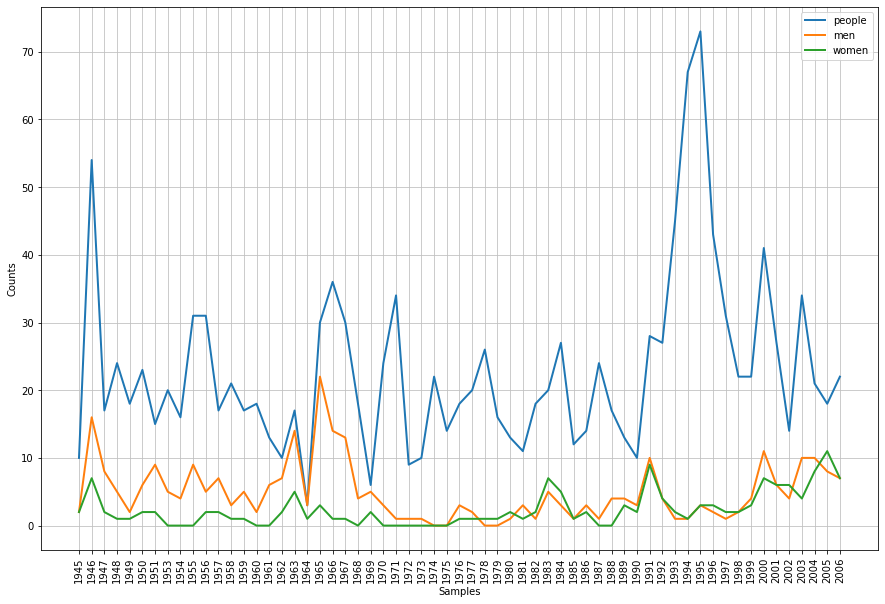

In [14]:
# to adjust the size of the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
cfd.plot();

In [15]:
# Exercise: 2-5
# Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym
# relation, so you need to use member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(),
# part_holonyms(), and substance_holonyms().

from nltk.corpus import wordnet as wn
[s.definition() for s in wn.synsets('school')]

['an educational institution',
 'a building where young people receive education',
 'the process of being formally educated at a school',
 'a body of creative artists or writers or thinkers linked by a similar style or by similar teachers',
 'the period of instruction in a school; the time period when school is in session',
 "an educational institution's faculty and students",
 'a large group of fish',
 'educate in or as if in a school',
 'teach or refine to be discriminative in taste or judgment',
 'swim in or form a large group of fish']

In [16]:
wn.synset('school.n.01').member_meronyms()

[Synset('schoolteacher.n.01'), Synset('staff.n.03')]

In [17]:
[s.definition() for s in wn.synsets('team')]

['a cooperative unit (especially in sports)',
 'two or more draft animals that work together to pull something',
 'form a team']

In [18]:
wn.synset('team.n.01').member_meronyms()

[Synset('stringer.n.01')]

In [19]:
wn.synset('team.n.01').part_meronyms()

[Synset('bench.n.06')]

In [20]:
wn.synset('school.n.02').part_meronyms()

[Synset('classroom.n.01')]

In [21]:
wn.synset('water.n.01').substance_meronyms()

[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]

In [22]:
wn.synset('blood.n.01').substance_meronyms()

[Synset('serum.n.01')]

In [23]:
[s.definition() for s in wn.synsets('player')]

['a person who participates in or is skilled at some game',
 'someone who plays a musical instrument (as a profession)',
 'a theatrical performer',
 'a person who pursues a number of different social and sexual partners simultaneously',
 'an important participant (as in a business deal)']

In [24]:
wn.synset('player.n.01').member_holonyms()

[]

In [25]:
wn.synset('player.n.01').part_holonyms()

[]

In [26]:
[s.definition() for s in wn.synsets('member')]

['one of the persons who compose a social group (especially individuals who have joined and participate in a group organization)',
 'anything that belongs to a set or class',
 'an external body part that projects from the body',
 'an organization that is a member of another organization (especially a state that belongs to a group of nations)',
 "the male organ of copulation (`member' is a euphemism)"]

In [27]:
wn.synset('member.n.01').member_holonyms()

[]

In [28]:
wn.synset('member.n.01').part_holonyms()

[]

In [29]:
wn.synset('wing.n.01').part_holonyms()

[Synset('angel.n.01'),
 Synset('bat.n.01'),
 Synset('bird.n.01'),
 Synset('insect.n.01')]

In [30]:
wn.synset('animal.n.01').member_holonyms()

[Synset('animalia.n.01')]

In [31]:
wn.synset('bird.n.01').member_holonyms()

[Synset('aves.n.01'), Synset('flock.n.02')]

In [32]:
wn.synset('water.n.01').substance_holonyms()

[Synset('body_of_water.n.01'),
 Synset('ice.n.01'),
 Synset('ice_crystal.n.01'),
 Synset('perspiration.n.01'),
 Synset('snowflake.n.01'),
 Synset('tear.n.01')]

In [33]:
# Exercise: 2-7
# According to Strunk and White’s Elements of Style, the word however, used at the start of a sentence, means
# “in whatever way” or “to whatever extent,” and not “nevertheless.” They give this example of correct usage: However
# you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the
# concordance tool to study actual usage of this word in the various texts we have been considering. See also the
# LanguageLog posting “Fossilized prejudices about ‘however’”
# at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html.

emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("However")

Displaying 25 of 131 matches:
 her many enjoyments . The danger , however , was at present so unperceived , t
ion would offend . Miss Churchill , however , being of age , and with the full 
n . From the expense of the child , however , he was soon relieved . The boy ha
 -- and been very well brought up . However , I do not mean to set up my opinio
f and predict . It was not likely , however , that any body should have equalle
to be borne . We will not despair , however . Weston may grow cross from the wa
is so very handsome and agreeable . However , I do really think Mr . Martin a v
 accepted after all . This letter , however , was written , and sealed , and se
e him ." " And if I did , ( which , however , I am far from allowing ) I should
 slightingly . Waiving that point , however , and supposing her to be , as you 
e was not so materially cast down , however , but that a little time and the re
ld inspire him ." The very next day however produced some proof of inspiration 
and staid 

In [34]:


def find_concordance_by_position(text, word, pos = 0):
    """
    Returns a concordance for a text only if the word is
    found at the given position.  Works on lists where each
    item is a separate sentence.

    Arguments:

    text: The text to be searched.  Must be a list where
          each item is a separate sentence.
    word: The word to be searched for.  Case insensitive.
    pos:  The position where the word should be found.
          Default is 0.
    """
    hits = 0

    for i in range(len(text)):
        if text[i][pos].lower() == word:
            prefix = text[i - 1]
            prefix = ' '.join(prefix)
            if len(prefix) < 35:
                prefix = (35 - len(prefix)) * " " + prefix
            suffix = text[i]
            suffix = ' '.join(suffix)
            print(prefix[-35:] + " " + suffix[:40])
            hits += 1

    if hits == 0:
        print("No matches.")

In [35]:
find_concordance_by_position(nltk.corpus.gutenberg.sents('austen-emma.txt'), "however", 0)

 -- and been very well brought up . However , I do not mean to set up my opi
is so very handsome and agreeable . However , I do really think Mr . Martin 
eed !-- and my memory is very bad . However , it was an exceeding good , pre
          Jane speaks so distinct ! However , she will not find her grandmam
inctly , and was sadly alarmed at . However , when I read on , I found it wa
hough she speaks rather too quick . However , she is very agreeable , and Mr
at I would not expose any body to . However , as they are so very desirous t
ar , I did say as much as I could . However , the very same evening William 
m often astonished at what I hear . However , this does make a difference ; 
aks like you and poor Miss Taylor . However , she seems a very obliging , pr
emed very much to have enjoyed it . However , _I_ shall always think it a ve
t least , but I might be mistaken . However , I think it answered so far as 


In [36]:
find_concordance_by_position(nltk.corpus.gutenberg.sents('milton-paradise.txt'), 'however', 0)

f scorn , not to be given the Foe . However I with thee have fixed my lot , 
pride , and joy , for Man seduced . However , some tradition they dispersed 


In [37]:
find_concordance_by_position(nltk.corpus.gutenberg.sents('bible-kjv.txt'), 'however', 0)

No matches.


In [38]:
find_concordance_by_position(nltk.corpus.gutenberg.sents('shakespeare-hamlet.txt'), 'however', 0)

No matches.


In [39]:
from nltk.corpus import brown

for c in brown.categories():
    print("Now analyzing {}: \n".format(c))

    find_concordance_by_position(brown.sents(categories = c), 'however', 0)

    print("\n")

Now analyzing adventure: 

ything but swarms of bees in them . However , when there's a job to be done 


Now analyzing belles_lettres: 

til well into the present century . However , in recent decades , for what d
absolutely certain of the answers . However , the system is designed , ingen
called `` historical monuments '' . However , just as all the buildings have
st and had even performed as such . However , when he assumed the duties of 
 dictates as faithfully as he can . However , there is always the possibilit
easurable properties of a command . However , for convenience we will stick 
 physiognomy of the Little People . However , it is important to trace the p
iritual forces into the situation . However , the crisis occurs precisely as
n that sense I can never be again . However , I confess my hope that I will 
may , like paradise , be regained . However , it was not of innocence in gen
mind and usage of Gentile and Jew . However , in the context of legal and ci
ling down on th

In [40]:
e = nltk.corpus.gutenberg.words('austen-emma.txt')
for i in range(len(e)):
    if e[i] == "However":
        prefix = []
        for word in e[i - 15 : i]:
            prefix.append(word)
        prefix = ' '.join(prefix)
        suffix = []
        for word in e[i : i + 15]:
            suffix.append(word)
        suffix = ' '.join(suffix)
        print(prefix[-35:] + " " + suffix[:40])

 -- and been very well brought up . However , I do not mean to set up my opi
is so very handsome and agreeable . However , I do really think Mr . Martin 
eed !-- and my memory is very bad . However , it was an exceeding good , pre
does me . Jane speaks so distinct ! However , she will not find her grandmam
inctly , and was sadly alarmed at . However , when I read on , I found it wa
hough she speaks rather too quick . However , she is very agreeable , and Mr
at I would not expose any body to . However , as they are so very desirous t
ar , I did say as much as I could . However , the very same evening William 
m often astonished at what I hear . However , this does make a difference ; 
aks like you and poor Miss Taylor . However , she seems a very obliging , pr
her , Mr . Suckling , in income .-- However , my resolution is taken as to n
forget her look the other night !-- However , I assure you , Miss Woodhouse 
y well ( blushing as she spoke ).-- However , now I will destroy it all -- a

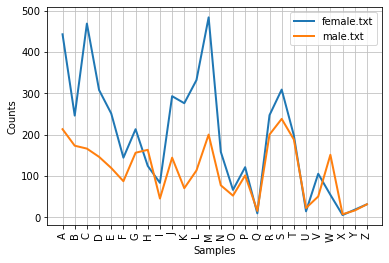

In [41]:
# Exercise: 2-8
# Define a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are
# more frequent for males versus females (see Figure 2-7).

names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')

cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))

cfd.plot();

In [42]:
# Exercise: 2-9
# Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre,
# etc. Can you find pairs of words that have quite different meanings across the two texts, such as monstrous in
# Moby Dick and in Sense and Sensibility?

enclitics = ("d", "ll", "m", "re", "s", "t", "ve")

print("King James' Bible:")
num_chars = len([w for w in gutenberg.raw('bible-kjv.txt') if w.isalpha()])
num_words = len([w for w in gutenberg.words('bible-kjv.txt') if w.isalpha() and w not in enclitics])
num_sents = len(gutenberg.sents('bible-kjv.txt'))
num_vocab = len(set(w.lower() for w in gutenberg.words('bible-kjv.txt') if w.isalpha() and w not in enclitics))
print("Average number of characters per word:", round(num_chars/num_words))
print("Average number of words per sent:",  round(num_words/num_sents))
print("Lexical diversity: {:.5f}".format(num_vocab/num_words))
print("Total tokens: {:,}".format(num_words))
print("Total word types: {:,}".format(num_vocab))

King James' Bible:
Average number of characters per word: 4
Average number of words per sent: 26
Lexical diversity: 0.01591
Total tokens: 790,052
Total word types: 12,567


In [43]:
nltk.Text(gutenberg.words('bible-kjv.txt')).concordance("cool")

Displaying 2 of 2 matches:
ORD God walking in the garden in the cool of the day : and Adam and his wife h
the tip of his finger in water , and cool my tongue ; for I am tormented in th


In [44]:
enclitics = ("d", "ll", "m", "re", "s", "t", "ve")

print("'The Man Who Was Thursday' by G.K. Chesterton:")
num_chars = len([w for w in gutenberg.raw('chesterton-thursday.txt') if w.isalpha()])
num_words = len([w for w in gutenberg.words('chesterton-thursday.txt') if w.isalpha() and w not in enclitics])
num_sents = len(gutenberg.sents('chesterton-thursday.txt'))
num_vocab = len(set(w.lower() for w in gutenberg.words('chesterton-thursday.txt') if w.isalpha() and w not in enclitics))
print("Average number of characters per word:", round(num_chars/num_words))
print("Average number of words per sent:",  round(num_words/num_sents))
print("Lexical diversity: {:.5f}".format(num_vocab/num_words))
print("Total tokens: {:,}".format(num_words))
print("Total word types: {:,}".format(num_vocab))

'The Man Who Was Thursday' by G.K. Chesterton:
Average number of characters per word: 4
Average number of words per sent: 16
Lexical diversity: 0.10796
Total tokens: 58,297
Total word types: 6,294


In [45]:
nltk.Text(gutenberg.words('chesterton-thursday.txt')).concordance("cool")

Displaying 4 of 4 matches:
oke and pleasure out of pain . Yea , cool and clear and sudden as a bird sings
 " that you seem to have kept pretty cool under it . Now listen to me . I like
ok round . Syme , who was commonly a cool character , was literally gaping as 
in plunging into the wood they had a cool shock of shadow , as of divers who p


In [46]:
# Exercise: 2-11
# Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own
# impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit
# significant differences across different genres?

cfd = nltk.ConditionalFreqDist(
    (genre, word) for genre in brown.categories()
    for word in brown.words(categories = genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her',
            'us', 'them']
cfd.tabulate(conditions = genres, samples = pronouns)

                   I  you   he  she   it   we they   me  him  her   us them 
           news  179   55  451   42  363   77  205   29   93  103   12   96 
       religion  155  100  137   10  264  176  115   31   60    8   59   74 
        hobbies  154  383  155   21  476  100  177   16   49   16   23  127 
science_fiction   98   81  139   36  129   30   53   20   58   71    6   47 
        romance  951  456  702  496  573   78  168  193  339  651   42  142 
          humor  239  131  146   58  162   32   70   56   48   62   23   49 


In [47]:
# Exercise: 2-12
# The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does
# it contain? What fraction of words in this dictionary have more than one possible pronunciation?

cmu = nltk.corpus.cmudict.entries()
len(cmu)

133737

In [48]:
distinct_words = sorted(set([w for w, p in cmu]))
len(distinct_words)

123455

In [49]:
(len(cmu) - len(distinct_words)) / len(cmu)

0.07688223902136282

In [50]:
# Exercise: 2-13
# What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

no_hyponyms = 0

for n in list(wn.all_synsets('n')):
    if not n.hyponyms():
        no_hyponyms += 1

no_hyponyms/len(list(wn.all_synsets('n')))

0.7967119283931072

In [51]:
# Exercise: 2-14
# Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the
# concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

def supergloss(synset):
    """
    Prints a concatentation of a word and its definition,
    along with the definitions of all of the word's hyper- and
    hyponyms.
    """
    full_stop = synset.index('.')
    term = synset[:full_stop]

    syn = wn.synset(synset)
    print(term + ":", syn.definition())


    print("\nHYPERNYMS:")
    for s in syn.hypernyms():
        names = []
        for name in s.lemma_names():
            names.append(name)
        print(", ".join(names) + ":", s.definition())

    print("\nHYPONYMS:")
    for s in syn.hyponyms():
        names = []
        for name in s.lemma_names():
            names.append(name)
        print(", ".join(names) + ":", s.definition())

In [52]:
supergloss('drum.n.01')

drum: a musical percussion instrument; usually consists of a hollow cylinder with a membrane stretched across each end

HYPERNYMS:
percussion_instrument, percussive_instrument: a musical instrument in which the sound is produced by one object striking another

HYPONYMS:
bass_drum, gran_casa: a large drum with two heads; makes a sound of indefinite but very low pitch
bongo, bongo_drum: a small drum; played with the hands
snare_drum, snare, side_drum: a small drum with two heads and a snare stretched across the lower head
tabor, tabour: a small drum with one head of soft calfskin
tambour: a drum
tambourine: a shallow drum with a single drumhead and with metallic disks in the sides
tenor_drum, tom-tom: any of various drums with small heads
timbrel: small hand drum similar to a tambourine; formerly carried by itinerant jugglers


In [53]:
# Exercise: 2-15
# Write a program to find all words that occur at least three times in the Brown Corpus.

def find_words_occurring_thrice_or_more():
    """
    Returns a list of words that occur at least three times
    in the Brown Corpus.
    """
    cfd = nltk.FreqDist(w.lower() for w in brown.words())
    wordtypes = set(w.lower() for w in brown.words())
    return [w for w in wordtypes if cfd[w] >= 3]

In [54]:
three_or_more = find_words_occurring_thrice_or_more()

In [55]:
len(three_or_more)

20615

In [56]:
three_or_more[:15]

['indies',
 'dictum',
 'indicators',
 'theories',
 'puny',
 'above',
 'glamorous',
 'phalanx',
 'cat',
 'blond',
 'consultants',
 'anna',
 'earthy',
 'psychic',
 'baths']

In [57]:
cfd = nltk.FreqDist(w.lower() for w in brown.words())

for t in three_or_more[:15]:
    print(t + ":", cfd[t])

indies: 9
dictum: 4
indicators: 9
theories: 20
puny: 6
above: 296
glamorous: 5
phalanx: 5
cat: 23
blond: 11
consultants: 7
anna: 7
earthy: 10
psychic: 3
baths: 5


In [58]:
d = dict()
for w in brown.words():
    d[w.lower()] = 1 + d.get(w.lower(), 0)
wordtypes = set(w.lower() for w in brown.words())
more_than_3 = [w for w in wordtypes if d[w] >= 3]
len(more_than_3)

20615

In [59]:
# Exercise: 2-16
# Write a program to generate a table of lexical diversity scores (i.e., token/type ratios), as we saw in Table 1-1.
# Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity
# (greatest number of tokens per type)? Is this what you would have expected?

def coerce_to_list(text):
    """
    Coerces nested list or string to a flat list.
    """

    # flatten nested lists
    if type(text[0]) == list:
        text = [i for s in text for i in s]
    # convert strings to lists
    elif type(text) == str:
        text = text.split(" ")

    return list(text)

In [60]:
def lexical_diversity(text):
    """
    Returns the lexical diversity score of a text.
    Generally speaking, the less frequently words are
    used on average in a text, the higher the score will be.
    """
    text = coerce_to_list(text)
    return len(set(text)) / len(text)

In [61]:
print("Lexical diversity scores: ")
for c in brown.categories():
    ld = lexical_diversity(brown.words(categories = c))
    print("{}: {} {}".format(c, " " * (15 - len(c)), ld))

Lexical diversity scores: 
adventure:        0.1279743878169075
belles_lettres:   0.10642071451679992
editorial:        0.16054152327770924
fiction:          0.1358194136199042
government:       0.11667641228232811
hobbies:          0.14493897625842492
humor:            0.23125144042406084
learned:          0.09268890745953554
lore:             0.13148804612915801
mystery:          0.12212912592488936
news:             0.14314696580941583
religion:         0.1617553745018909
reviews:          0.21192020440251572
romance:          0.12070492131044529
science_fiction:  0.22342778161713892


In [62]:
print("Number of tokens per category: \t Lexical diversity:")
for c in brown.categories():
    t = len(brown.words(categories = c))
    ld = lexical_diversity(brown.words(categories = c))
    print("{}: {} {} \t {:.5f}".format(c, " " * (20 - len(c)), t, ld))

Number of tokens per category: 	 Lexical diversity:
adventure:             69342 	 0.12797
belles_lettres:        173096 	 0.10642
editorial:             61604 	 0.16054
fiction:               68488 	 0.13582
government:            70117 	 0.11668
hobbies:               82345 	 0.14494
humor:                 21695 	 0.23125
learned:               181888 	 0.09269
lore:                  110299 	 0.13149
mystery:               57169 	 0.12213
news:                  100554 	 0.14315
religion:              39399 	 0.16176
reviews:               40704 	 0.21192
romance:               70022 	 0.12070
science_fiction:       14470 	 0.22343


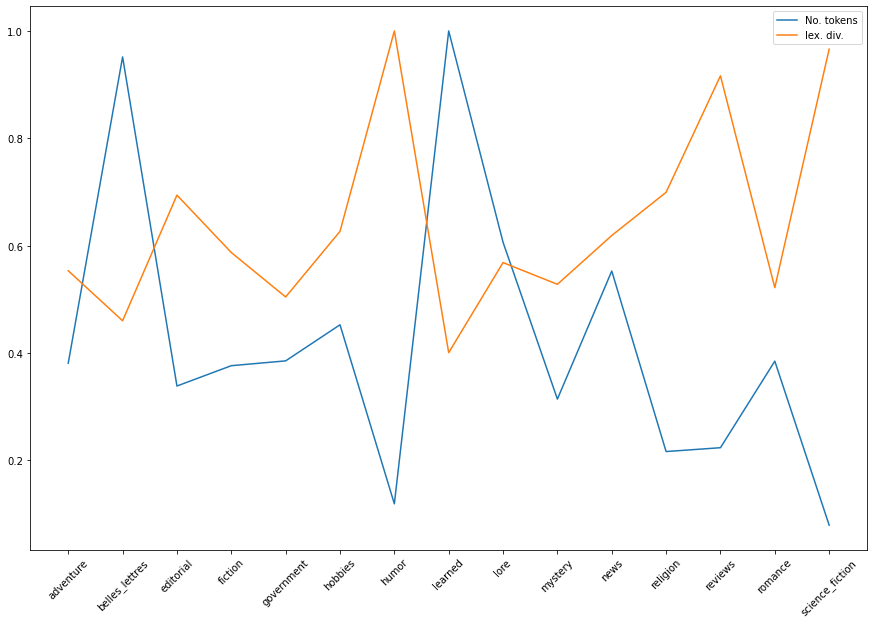

In [63]:
import matplotlib.pyplot as plt

tokens = []
lex_div = []

for c in brown.categories():
    tokens.append(len(brown.words(categories = c)))
    lex_div.append(lexical_diversity(brown.words(categories = c)))

# normalizing the arrays
tokens = [t/max(tokens) for t in tokens]
lex_div = [l/max(lex_div) for l in lex_div]

plt.figure(figsize = (15, 10))
plt.plot(tokens, label = "No. tokens")
plt.plot(lex_div, label = "lex. div.")
plt.legend()
plt.xticks(range(15), brown.categories(), rotation = 45)

plt.show()

In [64]:
# Exercise: 2-17
# Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

from nltk.corpus import stopwords

def find_most_frequent_non_stopwords(text, n = 50, lang = 'english'):
    """
    From a text, returns the n most frequent words that are
    not stopwords.

    Arguments:

    text: Text to be analyzed
    n:    Number of most frequent words
    lang: The language from which stopwords are to be used.
          Default is English.
    """
    text = coerce_to_list(text)
    stopwords = nltk.corpus.stopwords.words('english')
    fd = nltk.FreqDist(w.lower() for w in text if w.lower().isalpha() and w.lower() not in stopwords)
    return fd.most_common(n)

In [65]:
print(find_most_frequent_non_stopwords(brown.words(), 50), end = '')

[('one', 3292), ('would', 2714), ('said', 1961), ('new', 1635), ('could', 1601), ('time', 1598), ('two', 1412), ('may', 1402), ('first', 1361), ('like', 1292), ('man', 1207), ('even', 1170), ('made', 1125), ('also', 1069), ('many', 1030), ('must', 1013), ('af', 996), ('back', 966), ('years', 950), ('much', 937), ('way', 908), ('well', 897), ('people', 847), ('little', 831), ('state', 807), ('good', 806), ('make', 794), ('world', 787), ('still', 782), ('see', 772), ('men', 763), ('work', 762), ('long', 752), ('get', 749), ('life', 715), ('never', 697), ('day', 687), ('another', 684), ('know', 683), ('last', 676), ('us', 675), ('might', 672), ('great', 665), ('old', 661), ('year', 658), ('come', 630), ('since', 628), ('go', 626), ('came', 622), ('right', 613)]

In [66]:
from nltk.corpus import gutenberg

print(find_most_frequent_non_stopwords(gutenberg.words('whitman-leaves.txt'), 50), end = '')

[('see', 432), ('one', 355), ('old', 278), ('love', 275), ('life', 267), ('day', 265), ('shall', 263), ('yet', 262), ('thee', 261), ('long', 253), ('soul', 249), ('earth', 246), ('man', 243), ('night', 226), ('thy', 226), ('thou', 209), ('men', 199), ('sea', 192), ('death', 190), ('every', 181), ('know', 176), ('time', 172), ('come', 171), ('ever', 167), ('well', 167), ('great', 163), ('upon', 156), ('world', 152), ('many', 145), ('good', 141), ('hear', 137), ('like', 135), ('never', 133), ('hand', 133), ('face', 132), ('body', 125), ('give', 125), ('far', 123), ('pass', 122), ('last', 121), ('young', 118), ('land', 118), ('look', 118), ('go', 114), ('rest', 111), ('us', 109), ('sing', 108), ('new', 108), ('dead', 108), ('air', 108)]

In [67]:
print(find_most_frequent_non_stopwords(brown.words(categories = 'humor'), 50), end = '')

[('said', 88), ('one', 77), ('would', 56), ('time', 44), ('even', 39), ('like', 36), ('could', 33), ('way', 28), ('things', 28), ('two', 26), ('get', 25), ('little', 25), ('mother', 24), ('arlene', 24), ('man', 23), ('made', 23), ('us', 23), ('years', 21), ('day', 21), ('never', 20), ('new', 20), ('children', 20), ('people', 20), ('told', 20), ('asked', 19), ('much', 19), ('say', 19), ('letch', 19), ('barco', 18), ('another', 18), ('long', 18), ('room', 18), ('old', 17), ('many', 17), ('home', 17), ('last', 17), ('always', 17), ('funny', 17), ('moreland', 17), ('back', 16), ('know', 16), ('something', 16), ('first', 15), ('seemed', 15), ('well', 15), ('around', 15), ('went', 15), ('called', 15), ('house', 15), ('comedy', 15)]

In [68]:
print(find_most_frequent_non_stopwords(brown.sents(categories = 'humor'), 50), end = '')

[('said', 88), ('one', 77), ('would', 56), ('time', 44), ('even', 39), ('like', 36), ('could', 33), ('way', 28), ('things', 28), ('two', 26), ('get', 25), ('little', 25), ('mother', 24), ('arlene', 24), ('man', 23), ('made', 23), ('us', 23), ('years', 21), ('day', 21), ('never', 20), ('new', 20), ('children', 20), ('people', 20), ('told', 20), ('asked', 19), ('much', 19), ('say', 19), ('letch', 19), ('barco', 18), ('another', 18), ('long', 18), ('room', 18), ('old', 17), ('many', 17), ('home', 17), ('last', 17), ('always', 17), ('funny', 17), ('moreland', 17), ('back', 16), ('know', 16), ('something', 16), ('first', 15), ('seemed', 15), ('well', 15), ('around', 15), ('went', 15), ('called', 15), ('house', 15), ('comedy', 15)]

In [69]:
i = 0
for s in brown.sents():
    if "Af" in s:
        if i < 10:
            print(' '.join(s))
        i += 1

water is Af and the H stands for hydrogen ; ;
Salt water is still Af , the same hydrogen is there .
Start with the right-hand piece `` B '' , Af , soldering it to the lower piece `` A '' of the same material but 12'' '' long .
Now lay 12 pieces of Af cut 5-3/4'' '' long side by side but separated by 12 pieces of the same material 1/2'' '' sq. .
Cap this assembly ( with spacing bars in place ) with a Af bar .
Now cut five Af locking bar spacers ( which run horizontally ) .
Position these using six intermediate temporary Af spacers and locate the upper 12'' '' bar `` A '' .
Cap with a Af bar and tack-solder in place .
Cap the locking bar spacers with two Af directly under the first two `` B '' pieces .
Now reassemble the frame , using Af roundhead steel screws and nuts .


In [70]:
# Exercise: 2-18
# Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that
# contain stopwords.

def most_freq_bigrams_wo_stopwords(text, n = 50, lang = 'english'):
    """
    Returns a list of the most frequent bigrams in a
    text that can be formed without using stopwords.

    Arguments:

    text: Text to be analyzed
    n:    Number of most frequent bigrams
    lang: The language from which stopwords are to be used.
          Default is English.

    """
    text = coerce_to_list(text)
    stopwords = nltk.corpus.stopwords.words(lang)
    bigrams = nltk.bigrams(w.lower() for w in text if w.lower().isalpha() and w.lower() not in stopwords)
    fd = nltk.FreqDist(bigrams)
    return fd.most_common(n)

In [71]:
print(most_freq_bigrams_wo_stopwords(brown.words()), end = '')

[(('united', 'states'), 392), (('new', 'york'), 296), (('per', 'cent'), 146), (('years', 'ago'), 138), (('af', 'af'), 129), (('could', 'see'), 93), (('rhode', 'island'), 91), (('last', 'year'), 78), (('even', 'though'), 77), (('high', 'school'), 74), (('white', 'house'), 68), (('first', 'time'), 68), (('old', 'man'), 68), (('world', 'war'), 66), (('two', 'years'), 62), (('let', 'us'), 62), (('one', 'thing'), 60), (('fiscal', 'year'), 58), (('last', 'night'), 57), (('peace', 'corps'), 55), (('one', 'day'), 53), (('one', 'another'), 52), (('would', 'like'), 51), (('last', 'week'), 51), (('united', 'nations'), 49), (('new', 'england'), 49), (('young', 'man'), 47), (('los', 'angeles'), 47), (('two', 'men'), 46), (('one', 'two'), 43), (('great', 'deal'), 43), (('civil', 'war'), 42), (('president', 'kennedy'), 41), (('would', 'make'), 41), (('time', 'time'), 41), (('general', 'motors'), 41), (('small', 'business'), 41), (('long', 'time'), 40), (('new', 'orleans'), 40), (('many', 'years'), 40

In [72]:
print(most_freq_bigrams_wo_stopwords(brown.sents()), end = '')

[(('united', 'states'), 392), (('new', 'york'), 296), (('per', 'cent'), 146), (('years', 'ago'), 138), (('af', 'af'), 129), (('could', 'see'), 93), (('rhode', 'island'), 91), (('last', 'year'), 78), (('even', 'though'), 77), (('high', 'school'), 74), (('white', 'house'), 68), (('first', 'time'), 68), (('old', 'man'), 68), (('world', 'war'), 66), (('two', 'years'), 62), (('let', 'us'), 62), (('one', 'thing'), 60), (('fiscal', 'year'), 58), (('last', 'night'), 57), (('peace', 'corps'), 55), (('one', 'day'), 53), (('one', 'another'), 52), (('would', 'like'), 51), (('last', 'week'), 51), (('united', 'nations'), 49), (('new', 'england'), 49), (('young', 'man'), 47), (('los', 'angeles'), 47), (('two', 'men'), 46), (('one', 'two'), 43), (('great', 'deal'), 43), (('civil', 'war'), 42), (('president', 'kennedy'), 41), (('would', 'make'), 41), (('time', 'time'), 41), (('general', 'motors'), 41), (('small', 'business'), 41), (('long', 'time'), 40), (('new', 'orleans'), 40), (('many', 'years'), 40

In [73]:
# Exercise: 2-19
# Write a program to create a table of word frequencies by genre, like the one given in Accessing Text Corpora for
# modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss
# your findings.

cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories = genre))

arts = ['the', 'a', 'an', 'this', 'that', 'these', 'those']
cfd.tabulate(conditions = brown.categories(), samples = arts)

                  the     a    an  this  that these those 
      adventure  3370  1354   159   203   494    28    27 
 belles_lettres  9726  3308   583   627  1896   224   113 
      editorial  3508  1095   184   259   578    63    57 
        fiction  3423  1281   156   147   530    40    30 
     government  4143   867   208   344   489   107    61 
        hobbies  4300  1737   226   305   514   101    63 
          humor   930   505    75    59   241    16    10 
        learned 11079  3215   695   714  1695   314   137 
           lore  6328  2304   364   354   984   122    75 
        mystery  2573  1136   125   146   494    17    25 
           news  5580  1993   300   250   802    59    58 
       religion  2295   655   119   217   475    66    42 
        reviews  2048   874   163   143   336    29    24 
        romance  2758  1335   152   149   583    30    53 
science_fiction   652   222    33    49   126    12     7 


In [74]:
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories = genre))

advs = ['really', 'very', 'extremely', 'bit', 'absolutely', 'completely', 'literally', 'thoroughly', 'totally', 'utterly']
cfd.tabulate(conditions = brown.categories(), samples = advs)

                    really       very  extremely        bit absolutely completely  literally thoroughly    totally    utterly 
      adventure         18         41          0         11          1          7          0          1          0          3 
 belles_lettres         36        123          8          5          7         15          4          3          1          6 
      editorial         19         48          3          6          3          5          0          2          4          0 
        fiction         25         42          0          5          2          3          0          1          1          1 
     government          1         22          4          0          0          4          0          4          1          2 
        hobbies         14         63         10         15          1         13          4          9          2          1 
          humor          6         24          0          8          0          0          1          1        

In [75]:
# Exercise: 2-20
# Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and
# computes the frequency of the word in that section of the corpus.

from nltk.corpus import brown

def word_freq(word, genre):
    """
    Computes the word frequency of a given section in the
    Brown Corpus.

    Arguments:
    word:  word to be tallyed
    genre: category in the Brown Corpus
    """
    i = 0
    for w in brown.words(categories = genre):
        if w.lower() == word.lower():
            i += 1

    return i

In [76]:
word_freq("President", "news")

142

In [77]:
# Exercise: 2-21
# Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

def estimate_syllables(text):
    """
    Estimates the number of syllables in a text.
    Text may be a list, a nested list, or a string.
    """
    cmu = nltk.corpus.cmudict.dict()
    total_syllables = 0

    text = coerce_to_list(text)

    for w in text:
        # only look up words, and ignore words not in cmu
        if w.isalpha() and w.lower() in cmu:
            # use the digits in the entires to calculate
            # number of syllables
            for pron in (cmu[w.lower()][0]):
                for char in pron:
                    if char.isdigit():
                        total_syllables += 1
    return total_syllables

In [78]:
from nltk.corpus import gutenberg

print("{:,}".format(estimate_syllables(gutenberg.words('whitman-leaves.txt'))))

166,032


In [79]:
from nltk.corpus import brown

print("{:,}".format(estimate_syllables(brown.words(categories = 'humor'))))

25,349


In [80]:
from nltk.corpus import brown

print("{:,}".format(estimate_syllables(brown.sents(categories = 'humor'))))

25,349


In [81]:
estimate_syllables("This is a test")

4

In [82]:
# Exercise: 2-22
# Define a function hedge(text) that processes a text and produces a new version with the word 'like' between every
# third word.

def hedge(text, word, interval = 3, output = "string"):
    """
    Returns a modified version of a text with a specified word
    inserted at a designated interval.

    Arguments:

    text:     Text to be modified. Can be a list, nested list, or string.
    word:     Word to be inserted.  Must be a string.
    interval: After how many words should the target word be inserted?
              Default value is three.
    output:   Output can be a new string or a new list.  Default is string.
    """

    text = coerce_to_list(text)

    if output == "string":

        newstring = ""
        i = 1
        for t in text:
            if t.isalpha() and i % interval == 0:
                newstring += t + " " + word + " "
                i += 1
            elif t.isalpha():
                newstring += t + " "
                i += 1
            else:
                newstring += t + " "
        return newstring

    elif output == "list":

        newlist = []
        i = 1
        for t in text:
            if t.isalpha() and i % interval == 0:
                newlist.append(t)
                newlist.append(word)
                i += 1
            elif t.isalpha():
                newlist.append(t)
                i += 1
            else:
                newlist.append(t)
        return newlist

    else:
        print("Sorry, the output can only be a string or a list.")

In [83]:
hedge("this is a test of a test for a test", "like")

'this is a like test of a like test for a like test '

In [84]:
print(hedge(brown.sents(categories = 'humor')[0:5], "like", output = "list"), end = '')

['It', 'was', 'among', 'like', 'these', 'that', 'Hinkle', 'like', 'identified', 'a', 'photograph', 'like', 'of', 'Barco', '!', '!', 'For', 'like', 'it', 'seems', 'that', 'like', 'Barco', ',', 'fancying', 'himself', 'like', 'a', "ladies'", 'man', '(', 'and', 'like', 'why', 'not', ',', 'after', 'like', 'seven', 'marriages', '?', '?', ')', ',', 'had', 'like', 'listed', 'himself', 'for', 'like', 'Mormon', 'Beard', 'roles', 'like', 'at', 'the', 'instigation', 'like', 'of', 'his', 'fourth', 'like', 'murder', 'victim', 'who', 'like', 'had', 'said', ':', '``', 'With', 'like', 'your', 'beard', ',', 'dear', 'like', ',', 'you', 'ought', 'to', 'like', 'be', 'in', 'movies', 'like', "''", '!', '!', 'Mills', 'secured', "Barco's", 'photograph', 'like', 'from', 'the', 'gentleman', 'like', 'in', 'charge', ',', 'rushed', 'like', 'to', 'the', 'Hollywood', 'like', 'police', 'station', 'to', 'like', 'report', 'the', 'theft', 'like', ',', 'and', 'less', 'than', 'like', 'five', 'minutes', 'later', 'like', ','

In [85]:
print(hedge(brown.words(categories = 'humor')[:120], "like", interval = 5), end = '')

It was among these that like Hinkle identified a photograph of like Barco ! ! For it seems that like Barco , fancying himself a ladies' man like ( and why not , after seven like marriages ? ? ) , had listed himself for like Mormon Beard roles at the like instigation of his fourth murder like victim who had said : `` With like your beard , dear , you ought like to be in movies '' ! ! Mills like secured Barco's photograph from the gentleman like in charge , rushed to the like Hollywood police station to report like the theft , and less than like five minutes later , detectives with like his picture in hand were like on the trail of Cal like Barco . On their way , they like stopped at 

In [86]:
# Exercise: 2-23
# Zipf’s Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked
# according to their frequency, with the most frequent word first. Zipf’s Law states that the frequency of a word
# type is inversely proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th most
# common word type should occur three times as frequently as the 150th most common word type.
# a: Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you
# confirm Zipf’s law? (Hint: it helps to use a logarithmic scale.) What is going on at the extreme ends of the plotted
# line?

ep = [w.lower() for w in gutenberg.words('edgeworth-parents.txt') if w.isalpha()]
fd = nltk.FreqDist(ep)

In [87]:
fd.most_common(50)[-1]

('now', 508)

In [88]:
fd.most_common(150)[-1]

('nothing', 152)

In [89]:
ranks_counts = [(ranks + 1, counts) for ranks, counts in enumerate([counts for words, counts in fd.most_common(150)])]
ranks, counts = zip(*ranks_counts)

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def plot_Zipf(text, title = '', scale = 'log', n = 150, plot_style = 'k-', reg_line = 'c--'):
    """
    Generates a plot showing word rank against
    word frequency.

    Arguments:
    text:       May be a list, nested list, or string
    title:      Optional title for the resulting plot
    scale:      May be 'log' or 'linear'.  Default is 'log'
    n:          Number of words considered.  Default is 150.
    plot_style: Style of the scatter plots.  Default is a
                black line.
    reg_line:   Style of the regression line.  Default
                is cyan dashes.
    """
    plt.figure(figsize=(15, 10))

    # coerce text to list
    text = coerce_to_list(text)

    # create frequency distribution
    edited = [w.lower() for w in text if w.isalpha()]
    fd = nltk.FreqDist(edited)

    # extract the ranks and accompanying counts
    ranks_counts = [(ranks + 1, counts) for ranks, counts in enumerate([counts for words, counts in fd.most_common(n)])]
    ranks, counts = zip(*ranks_counts)

    plt.xscale(scale)
    plt.yscale(scale)

    if scale == 'log':
        plt.xlabel('Word Ranking (logarithmic scale)')
        plt.ylabel('Word Counts (logarithimc scale)')

        # adding regression line for log scale
        logR = np.log(np.asarray(ranks))
        logC = np.log(np.asarray(counts))

        m, c = np.polyfit(logR, logC, 1)
        y_fit = np.exp(m * logR + c)

        plt.plot(ranks, y_fit, reg_line)

    else:
        plt.xlabel('Word Ranking')
        plt.ylabel('Word Counts')

    # add title if necessary
    if len(title) != 0:
        plt.title('Zipf analysis of {}'.format(title))
    else:
        plt.title('Zipf analysis of text')

    plt.plot(ranks, counts, plot_style)
    plt.show()

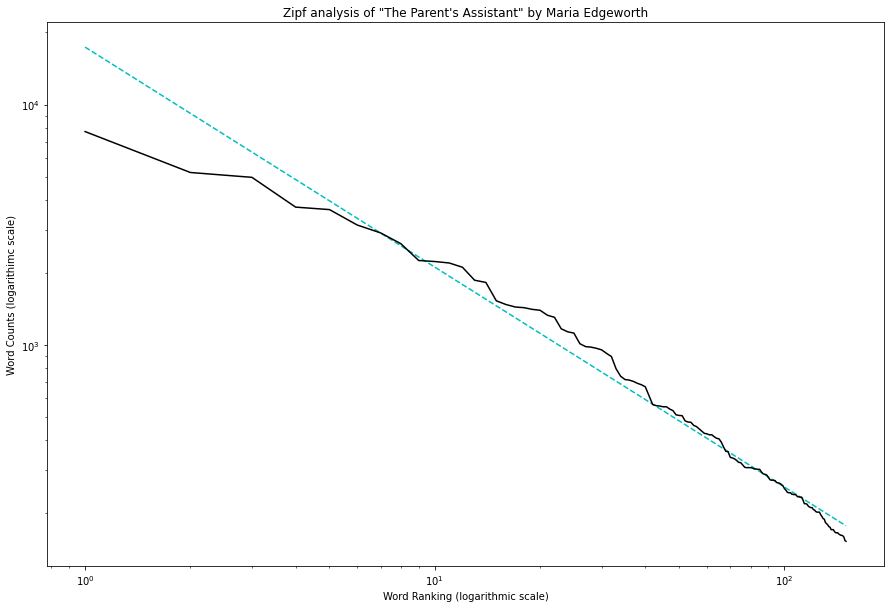

In [91]:
plot_Zipf(gutenberg.words('edgeworth-parents.txt'), title = '"The Parent\'s Assistant" by Maria Edgeworth',
          plot_style = 'k-')

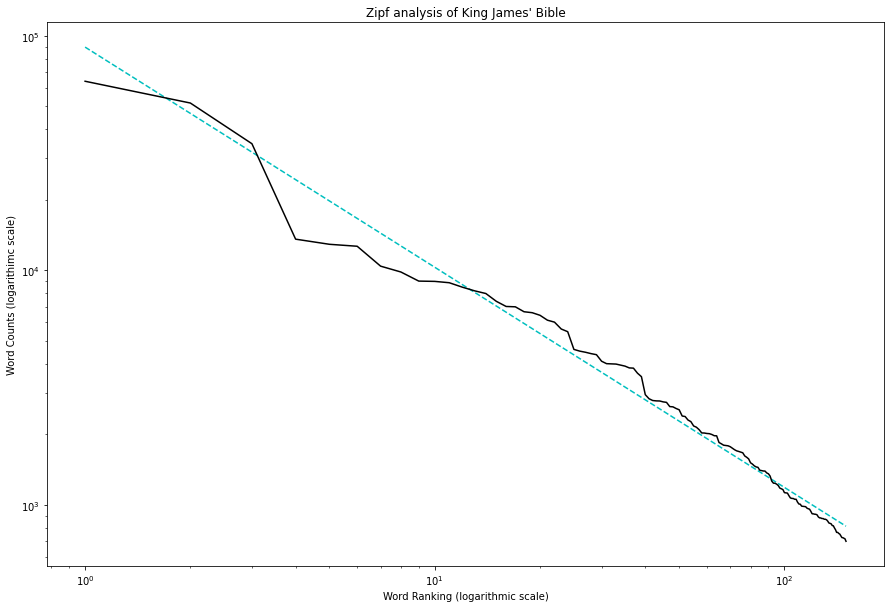

In [92]:
plot_Zipf(gutenberg.words('bible-kjv.txt'), title = 'King James\' Bible')

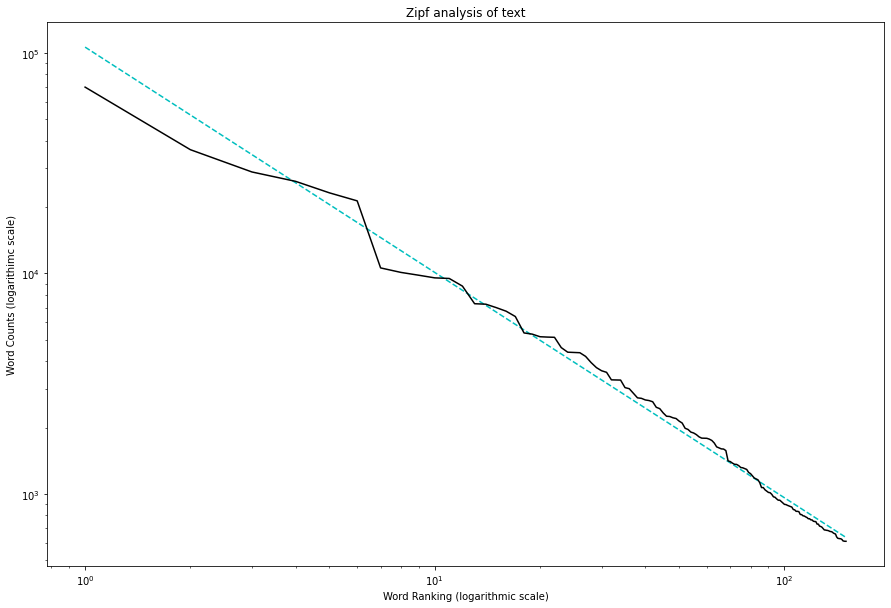

In [93]:
plot_Zipf(brown.sents())

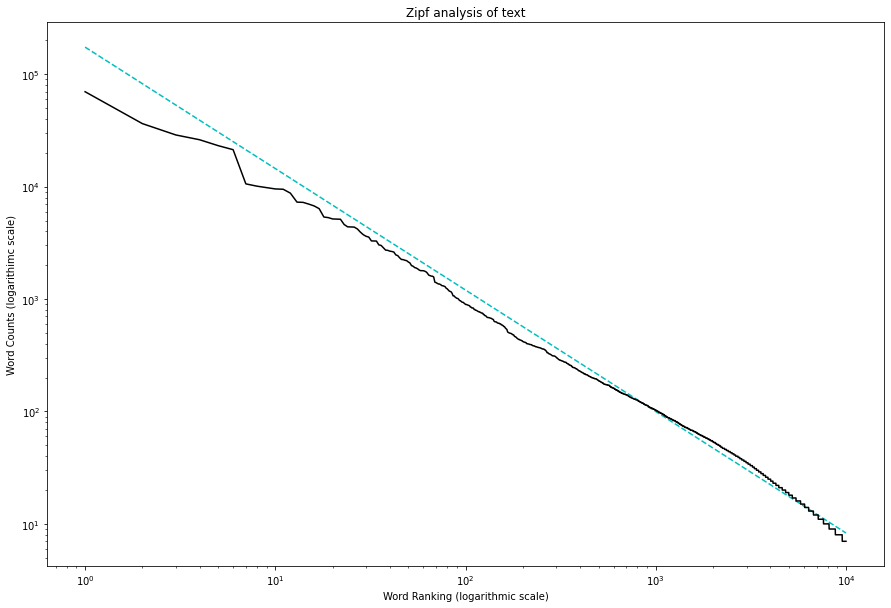

In [94]:
plot_Zipf(brown.sents(), n = 10000)

In [95]:
# b: Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You
# will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long
# string. Then tokenize this string, generate the Zipf plot as before, and compare the two plots. What do you make of
# Zipf’s Law in the light of this?

import random

test = ""

for i in range(5000000):
    test += random.choice("abcdefg ")

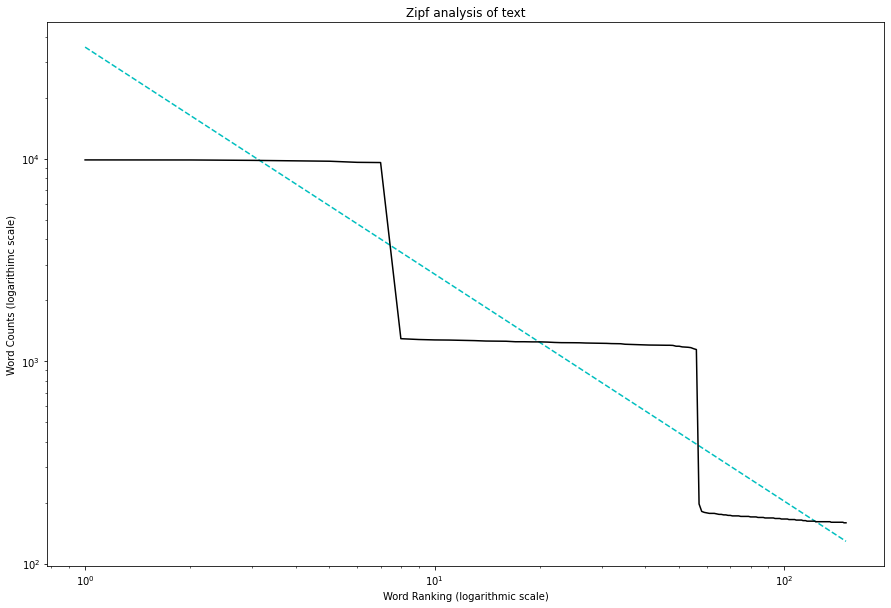

In [96]:
plot_Zipf(test)

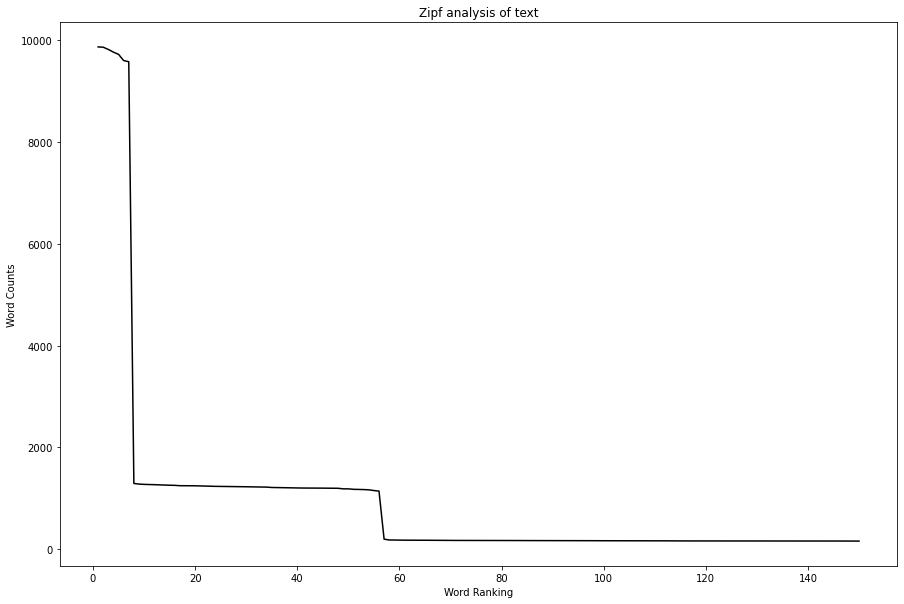

In [97]:
plot_Zipf(test, scale = "linear")

In [98]:
import random

test2 = []

for i in range(80000000):
    test2.append(random.choice("abcdefghijklmnopqrstuvwxyz "))

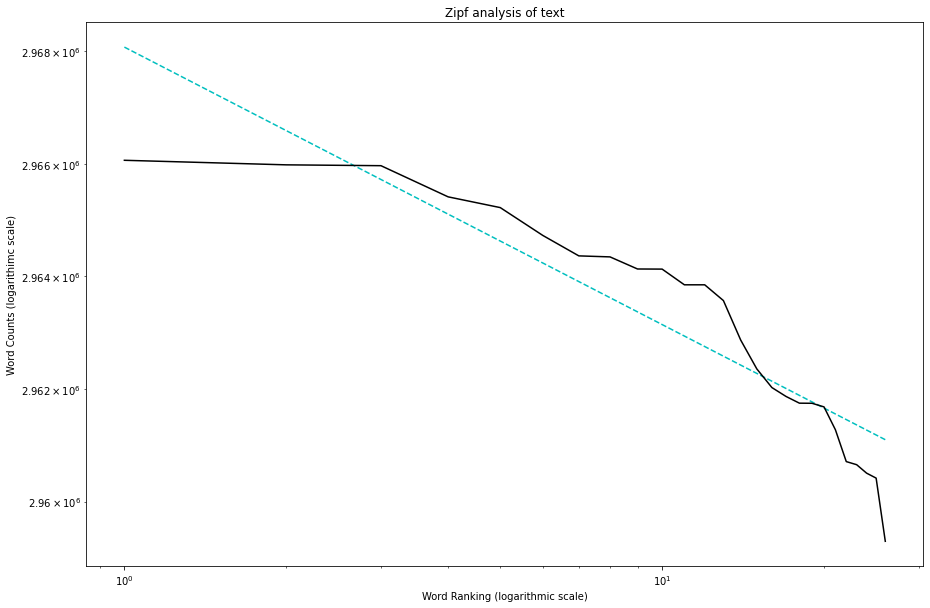

In [99]:
plot_Zipf(test2)

In [100]:
# Exercise: 2-24
# Modify the text generation program in Example 2-1 further, to do the following tasks:
# a: Store the n most likely words in a list words, then randomly choose a word from the list using random.choice().
# (You will need to import random first.)

import random

def generate_random_text(text, num = 15, n = 50):
    """
    Uses a frequency distribution based upon a text to produce quasi-coherent
    random text.  Starting word is selected from a list of the n most common
    words in the text.

    Arguments:

    text: The text to be sampled from.  May be a string, list, or nested list.
    num:  The length in words of the string to be returned.
    n:    Size of the list of the nth most common words from which the
          initial word is chosen.
    """
    # coerce to list
    text = coerce_to_list(text)

    # make a distribution of bigrams
    bigrams = nltk.bigrams(text)
    cfd = nltk.ConditionalFreqDist(bigrams)

    # create a list of the nth most likely words, and choose one to
    # initialize the string of random words
    most_likely_words = nltk.FreqDist([w.lower() for w in text if w.isalpha()]).most_common(n)
    words, counts = zip(*most_likely_words)
    word = random.choice(words)

    # print out the current word, and randomly choose the subsequent word
    # from the cfd's keys
    for i in range(num):
        print(word, end = ' ')
        word = random.choice(list(cfd[word].keys()))

In [101]:
generate_random_text(nltk.corpus.genesis.words('english-kjv.txt'))

his journeys from a river of Cainan were circumcised . Leah his foreskin . All 

In [102]:
generate_random_text(gutenberg.words('shakespeare-macbeth.txt'), num = 50)

which my Thane is receyu ' Equiuocation of England Don . Heauen he growes In an Honor must doe not vpon thee hither Malc . O valiant Banquo gone before ? Come sir Mes . Your fauors , Father is your Enemie of Blaspheming Iew , Life ? your approach 

In [103]:
generate_random_text(brown.sents(categories = 'lore'), num = 50)

if organizational activities of ( always will admire the pupils . Work that everyone in psychotherapy are discouraged ! Like hell ! Stop the shopping district had sailed near cloudburst proportions had condemned patent bar as commander and adulthood . Coconuts , Hanch drafted a storage temperature for six feet 

In [104]:
generate_random_text(brown.words(categories = 'news'), num = 50)

by accident or probation . Assistant Prosecutor Fred Lewis Kaufnabb , 4 under both years at Johnston , unarmed . Scores of quarterbacks , Stan Musial probably a barber shop , Pamela , read on election day against Southeast Library Week and John E. Mitchell is Ray Carbones , Task 

In [110]:
generate_random_text(brown.words(categories = ['humor', 'news', 'religion']), num = 50)

at 3:30 tomorrow . Thomas Lockies , created good job with interested young executive who so busy place for reelection . Heavy support but lately , filled out , Fortier High Court judge said other test suit to kill the coral-colored boucle dress , Indonesia , sirens and explained by 

In [111]:
# b: Select a particular genre, such as a section of the Brown Corpus or a Genesis translation, one of the Gutenberg
# texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have
# to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of
# this method of generating random text.

def make_ngram(array, index, n):
    """
    Returns a list of the n words following
    the word at the indexed point in the array.
    """
    ngram = []
    for j in range(1, n + 1):
        ngram.append(array[index + j])

    return ngram

def make_markov_dict(array, n):
    """
    Takes a list of words and returns a dictionary
    of all possible ngrams following each word in the array.
    """

    d = {}
    l = len(array)

    # adding padding so function doesn't crash at end of array
    array.extend(" " * n)

    for e in range(l):
        ngram = make_ngram(array, e, n)
        if array[e] not in d:
            d[array[e]] = ([ngram])
        else:
            d[array[e]] += ([ngram])

    # dictionary values for items at the end of the array
    # will have empty strings, and these need to be the
    # same size as the other values to prevent the code
    # from throwing an error

    d[" "] = " " * n
    return d

def minimarkov(d, word):
    """
    Randomly chooses one ngram from a Markov dictionary.
    """
    return random.choice(d[word])

def make_markov_text(text, n, length):
    """
    Takes a text, divides it into individual words, and the makes
    a Markov dict for each word and all possible ngrams that
    follow it.  Then a word is randomly chosen, and of the ngrams
    that followed that word in the text, one is selected and
    concatenated to the new text.  New text is printed.

    Arguments:
    text: a raw text
    n: length of ngrams, i.e., words that occur together
        in the text.  The higher n, the more natural the
        resulting text.
    length: number of ngrams to be concatenated. Length of final
        text will be 1 + n * length.
    """

    if type(text) != list:
        text = coerce_to_list(text)

    d = make_markov_dict(text, n)
    start = random.choice(list(d.keys()))
    markov_text = [start]

    for i in range(length):
        markov_text.extend(minimarkov(d, markov_text[-1]))
    for word in markov_text:
        print(word, end = " ")

In [112]:
make_markov_text(gutenberg.words('shakespeare-macbeth.txt'), 2, 20)

pure as Snow , and Banquoh ? 1 . If he come , That would be worne now in this earthly world : the like the time , Before we reckon with your Enemie Murth . I cannot taint with Feare 

In [113]:
make_markov_text(brown.words(), 4, 20)

1-ton conditioner will provide 12,000 feet , Fiedler signaled that she wanted him . But he was when the gun went in to register . The bed was empty peace the world offers them the Dionysian dialectic '' , the proper fund , as the war , and the Seventh Fleet's principal port of Nantucket , Massachusetts , negotiated , with deadly efficiency ; ; ; from the General's decisions the nature of cylinders in the engine gives the engine's total 

In [114]:
make_markov_text(brown.sents(), 5, 20)

Hockaday School meals from 1946 to the more normal rate of by a simple negative answer cannot be derived from any specific provision it would seem to '' , said Henrietta nodded . How much they needed professionals , men who had publicly disowned his daughter and granddaughter of New England ( Massachusetts , Connecticut , a four-fold increase . This is particularly acute for those places which in sorrows cheere you and beguile you in 213 B.C. , with the same way . This year '' . Gus Ehlers , come to clean the room sat the teacher . His 

In [115]:
# Exercise: 2-25
# Define a function find_language() that takes a string as its argument and returns a list of languages that have
# that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

from nltk.corpus import udhr

def find_language(word):
    """
    Returns a list of languages which use a given word
    in their Universal Declaration of Human Rights.
    """
    latin1_langs = [l for l in udhr.fileids() if l.endswith('Latin1')]
    matches = []
    for l in latin1_langs:
        if word in udhr.words(l):
            matches.append(l[:-7])

    return matches

In [116]:
print(find_language('man'), end = '')

['Bichelamar', 'Bikol_Bicolano', 'Cakchiquel', 'Chamorro', 'Chuuk_Trukese', 'English', 'Friulian_Friulano', 'Hiligaynon', 'Ibibio_Efik', 'Iloko_Ilocano', 'Kapampangan', 'Kiche_Quiche', 'Luxembourgish_Letzebuergeusch', 'Mam', 'Marshallese', 'NigerianPidginEnglish', 'Sharanahua', 'SolomonsPidgin_Pijin', 'Tiv', 'TokPisin', 'Trukese_Chuuk', 'Waray']

In [117]:
print(find_language('and'), end = '')

['Albanian_Shqip', 'Bemba', 'Cebuano', 'English', 'NigerianPidginEnglish', 'Romani']

In [118]:
# Exercise: 2-26
# What is the branching factor of the noun hypernym hierarchy? I.e., for every noun synset that has hyponyms—or
# children in the hypernym hierarchy—how many do they have on average? You can get all noun synsets using
# wn.all_synsets('n').

from nltk.corpus import wordnet as wn

l = list(wn.all_synsets('n'))

hypo_branches = []
for i in l:
    hypo_branches.append(len(i.hyponyms()))

sum(hypo_branches)/len(hypo_branches)

0.9237045606770992

In [119]:
hyper_branches = []
for i in l:
    hyper_branches.append(len(i.hypernyms()))
sum(hyper_branches)/len(hyper_branches)

0.9237045606770992

In [120]:
# Exercise: 2-27
# The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has seven
# senses with len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives, and adverbs
# according to WordNet.

l = list(wn.all_synsets('v'))
for syn in l[:5]:
    print(syn.lemma_names())

['breathe', 'take_a_breath', 'respire', 'suspire']
['respire']
['respire']
['choke']
['hyperventilate']


In [121]:
len(wn.synsets('breathe', 'v'))

9

In [122]:
len(wn.synsets('take_a_breath', 'v'))

1

In [123]:
pos = ['nouns', 'verbs', 'adjectives', 'adverbs']
abb = ['n', 'v', 'a', 'r']
ave_poly = []

for i in range(len(pos)):
    # get all items for this part of speech
    syn_list = list(wn.all_synsets(abb[i]))

    entries = []
    for syn in syn_list:
        # some items have more than one entry, so we need to
        # make sure all entries are accounted for
        for entry in syn.lemma_names():
            entries.append(entry)

    # if a word has x senses, it will be in this list x times,
    # so we need to get rid of duplicates
    entries = set(entries)

    # tally of senses for this pos
    polysemy = 0

    # iterate through entries and add number of senses
    for entry in set(entries):
        polysemy += len(wn.synsets(entry, abb[i]))


    ave_poly.append(polysemy/len(entries))

for i in range(len(pos)):
    print("The average polysemy for the {} in WordNet is {:.5f}.".format(pos[i], ave_poly[i]))

The average polysemy for the nouns in WordNet is 1.28336.
The average polysemy for the verbs in WordNet is 2.18663.
The average polysemy for the adjectives in WordNet is 1.41048.
The average polysemy for the adverbs in WordNet is 1.25329.


In [124]:
# Exercise: 2-28
# Use one of the predefined similarity measures to score the similarity of each of the following pairs of words.
# Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that
# was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad,
# coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane,
# tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland,
# food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile,
# glass-magician, rooster-voyage, noon-string.

pairs = [["car", "automobile"],
          ["gem", "jewel"],
          ["journey", "voyage"],
          ["boy", "lad"],
          ["coast", "shore"],
          ["asylum", "madhouse"],
          ["magician", "wizard"],
          ["midday", "noon"],
          ["furnace", "stove"],
          ["food", "fruit"],
          ["bird", "cock"],
          ["bird", "crane"],
          ["tool", "implement"],
          ["brother", "monk"],
          ["lad", "brother"],
          ["crane", "implement"],
          ["journey", "car"],
          ["monk", "oracle"],
          ["cemetery", "woodland"],
          ["food", "rooster"],
          ["coast", "hill"],
          ["forest", "graveyard"],
          ["shore", "woodland"],
          ["monk", "slave"],
          ["coast", "forest"],
          ["lad", "wizard"],
          ["chord", "smile"],
          ["glass", "magician"],
          ["rooster", "voyage"],
          ["noon", "string"]]

In [125]:
path_sim_scores = []
for pair in pairs:

    scores = []
    # iterate through all the different senses and take the
    # one with the highest similarity score
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.path_similarity(second))
    path_sim_scores.append([max(scores), (pair[0], pair[1])])

In [126]:
sorted(path_sim_scores, reverse = True)

[[1.0, ('midday', 'noon')],
 [1.0, ('magician', 'wizard')],
 [1.0, ('gem', 'jewel')],
 [1.0, ('car', 'automobile')],
 [0.5, ('tool', 'implement')],
 [0.5, ('journey', 'voyage')],
 [0.5, ('coast', 'shore')],
 [0.5, ('brother', 'monk')],
 [0.5, ('boy', 'lad')],
 [0.5, ('bird', 'cock')],
 [0.5, ('asylum', 'madhouse')],
 [0.25, ('bird', 'crane')],
 [0.2, ('shore', 'woodland')],
 [0.2, ('monk', 'slave')],
 [0.2, ('lad', 'wizard')],
 [0.2, ('lad', 'brother')],
 [0.2, ('crane', 'implement')],
 [0.2, ('coast', 'hill')],
 [0.16666666666666666, ('coast', 'forest')],
 [0.125, ('monk', 'oracle')],
 [0.125, ('glass', 'magician')],
 [0.1111111111111111, ('forest', 'graveyard')],
 [0.1111111111111111, ('cemetery', 'woodland')],
 [0.1, ('furnace', 'stove')],
 [0.1, ('food', 'fruit')],
 [0.09090909090909091, ('chord', 'smile')],
 [0.08333333333333333, ('noon', 'string')],
 [0.0625, ('food', 'rooster')],
 [0.05555555555555555, ('journey', 'car')],
 [0.041666666666666664, ('rooster', 'voyage')]]

In [127]:
lch_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.lch_similarity(second))
    lch_sim_scores.append([max(scores), (pair[0], pair[1])])

In [128]:
sorted(lch_sim_scores, reverse = True)

[[3.6375861597263857, ('midday', 'noon')],
 [3.6375861597263857, ('magician', 'wizard')],
 [3.6375861597263857, ('gem', 'jewel')],
 [3.6375861597263857, ('car', 'automobile')],
 [2.9444389791664407, ('tool', 'implement')],
 [2.9444389791664407, ('journey', 'voyage')],
 [2.9444389791664407, ('coast', 'shore')],
 [2.9444389791664407, ('brother', 'monk')],
 [2.9444389791664407, ('boy', 'lad')],
 [2.9444389791664407, ('bird', 'cock')],
 [2.9444389791664407, ('asylum', 'madhouse')],
 [2.2512917986064953, ('bird', 'crane')],
 [2.0281482472922856, ('shore', 'woodland')],
 [2.0281482472922856, ('monk', 'slave')],
 [2.0281482472922856, ('lad', 'wizard')],
 [2.0281482472922856, ('lad', 'brother')],
 [2.0281482472922856, ('crane', 'implement')],
 [2.0281482472922856, ('coast', 'hill')],
 [1.845826690498331, ('coast', 'forest')],
 [1.55814461804655, ('monk', 'oracle')],
 [1.55814461804655, ('glass', 'magician')],
 [1.4403615823901665, ('forest', 'graveyard')],
 [1.4403615823901665, ('cemetery', 'w

In [129]:
wup_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.wup_similarity(second))
    wup_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(wup_sim_scores, reverse = True)

[[1.0, ('midday', 'noon')],
 [1.0, ('magician', 'wizard')],
 [1.0, ('gem', 'jewel')],
 [1.0, ('car', 'automobile')],
 [0.9523809523809523, ('journey', 'voyage')],
 [0.9523809523809523, ('brother', 'monk')],
 [0.9523809523809523, ('bird', 'cock')],
 [0.9523809523809523, ('asylum', 'madhouse')],
 [0.9473684210526315, ('boy', 'lad')],
 [0.9333333333333333, ('tool', 'implement')],
 [0.9090909090909091, ('coast', 'shore')],
 [0.8695652173913043, ('bird', 'crane')],
 [0.75, ('crane', 'implement')],
 [0.6666666666666666, ('monk', 'slave')],
 [0.6666666666666666, ('lad', 'wizard')],
 [0.6666666666666666, ('lad', 'brother')],
 [0.6666666666666666, ('coast', 'hill')],
 [0.6, ('shore', 'woodland')],
 [0.5714285714285714, ('monk', 'oracle')],
 [0.5454545454545454, ('coast', 'forest')],
 [0.5263157894736842, ('furnace', 'stove')],
 [0.47058823529411764, ('glass', 'magician')],
 [0.42857142857142855, ('forest', 'graveyard')],
 [0.42857142857142855, ('cemetery', 'woodland')],
 [0.4, ('food', 'fruit')

In [130]:
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')
semcor_ic = wordnet_ic.ic('ic-semcor.dat')

In [131]:
res_brown_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.res_similarity(second, brown_ic))
    res_brown_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(res_brown_sim_scores, reverse = True)

[[12.067704640264017, ('gem', 'jewel')],
 [11.980693263274388, ('magician', 'wizard')],
 [11.064402531400233, ('midday', 'noon')],
 [9.475167326283652, ('asylum', 'madhouse')],
 [9.415743905812851, ('coast', 'shore')],
 [9.261593225985592, ('brother', 'monk')],
 [8.399491822958641, ('boy', 'lad')],
 [7.677754930752808, ('bird', 'crane')],
 [7.677754930752808, ('bird', 'cock')],
 [7.591401417609093, ('car', 'automobile')],
 [6.825957625204375, ('journey', 'voyage')],
 [5.884681030765606, ('coast', 'hill')],
 [5.87738923441087, ('tool', 'implement')],
 [3.2576790258866897, ('crane', 'implement')],
 [2.61964384137646, ('chord', 'smile')],
 [2.333545243735693, ('monk', 'slave')],
 [2.333545243735693, ('monk', 'oracle')],
 [2.333545243735693, ('lad', 'wizard')],
 [2.333545243735693, ('lad', 'brother')],
 [2.305848731451232, ('furnace', 'stove')],
 [2.282647491973017, ('glass', 'magician')],
 [1.5927548636075812, ('food', 'fruit')],
 [1.2900256809649917, ('shore', 'woodland')],
 [1.290025680

In [132]:
res_semcor_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.res_similarity(second, semcor_ic))
    res_semcor_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(res_semcor_sim_scores, reverse = True)

[[1e+300, ('gem', 'jewel')],
 [11.072612668084629, ('magician', 'wizard')],
 [10.667147559976465, ('asylum', 'madhouse')],
 [10.156321936210475, ('brother', 'monk')],
 [9.568535271308354, ('midday', 'noon')],
 [8.102198202514929, ('coast', 'shore')],
 [7.140787035360304, ('journey', 'voyage')],
 [7.003585913846818, ('car', 'automobile')],
 [6.937446111342273, ('bird', 'crane')],
 [6.937446111342273, ('bird', 'cock')],
 [6.741879327798298, ('boy', 'lad')],
 [6.3104387332868725, ('tool', 'implement')],
 [6.138138734953937, ('coast', 'hill')],
 [3.445068277596125, ('crane', 'implement')],
 [3.071760281122492, ('chord', 'smile')],
 [2.493384085748939, ('furnace', 'stove')],
 [1.9033026456664381, ('monk', 'slave')],
 [1.9033026456664381, ('monk', 'oracle')],
 [1.9033026456664381, ('lad', 'wizard')],
 [1.9033026456664381, ('lad', 'brother')],
 [1.8746991911165738, ('glass', 'magician')],
 [1.7798171161722536, ('food', 'fruit')],
 [1.1692001183611416, ('shore', 'woodland')],
 [1.1692001183611

In [133]:
jcn_brown_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.jcn_similarity(second, brown_ic))
    jcn_brown_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(jcn_brown_sim_scores, reverse = True)

[[1e+300, ('midday', 'noon')],
 [1e+300, ('magician', 'wizard')],
 [1e+300, ('gem', 'jewel')],
 [1e+300, ('car', 'automobile')],
 [3.91777688470154, ('brother', 'monk')],
 [1.524742319195391, ('tool', 'implement')],
 [1.3905833398673364, ('coast', 'shore')],
 [0.31262963211624767, ('asylum', 'madhouse')],
 [0.2917960864569923, ('boy', 'lad')],
 [0.2562806264117196, ('journey', 'voyage')],
 [0.22295252107511723, ('bird', 'cock')],
 [0.19310957723222136, ('bird', 'crane')],
 [0.12697965461225075, ('coast', 'hill')],
 [0.09150386768607839, ('food', 'fruit')],
 [0.08598151736322068, ('crane', 'implement')],
 [0.0734069276489804, ('lad', 'brother')],
 [0.07337477103699754, ('lad', 'wizard')],
 [0.07307364582678529, ('monk', 'slave')],
 [0.0693608307201355, ('journey', 'car')],
 [0.06409104911742998, ('furnace', 'stove')],
 [0.06313551271889126, ('food', 'rooster')],
 [0.062439198995426916, ('monk', 'oracle')],
 [0.062357662794309016, ('chord', 'smile')],
 [0.060793000212738556, ('shore', 'w

In [134]:
jcn_semcor_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.jcn_similarity(second, semcor_ic))
    jcn_semcor_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(jcn_semcor_sim_scores, reverse = True)

[[1e+300, ('midday', 'noon')],
 [1e+300, ('magician', 'wizard')],
 [1e+300, ('gem', 'jewel')],
 [1e+300, ('car', 'automobile')],
 [2.4663034623764357, ('asylum', 'madhouse')],
 [1.6154065629778043, ('coast', 'shore')],
 [0.8484246900949288, ('tool', 'implement')],
 [0.3533884661459109, ('journey', 'voyage')],
 [0.29287357108779505, ('boy', 'lad')],
 [0.2681179750637138, ('bird', 'cock')],
 [0.21866844070659408, ('coast', 'hill')],
 [0.08607225144270927, ('food', 'fruit')],
 [0.08296308648149416, ('lad', 'brother')],
 [0.07904013229162012, ('chord', 'smile')],
 [0.07587503982877675, ('lad', 'wizard')],
 [0.07069949326074976, ('journey', 'car')],
 [0.06894384233921792, ('brother', 'monk')],
 [0.06710706557957427, ('food', 'rooster')],
 [0.06613868498379295, ('monk', 'slave')],
 [0.0652694046478817, ('noon', 'string')],
 [0.0627623451593688, ('coast', 'forest')],
 [0.06044544459671397, ('glass', 'magician')],
 [0.05969082994987968, ('furnace', 'stove')],
 [0.05939508258297386, ('shore', '

In [135]:
lin_brown_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.lin_similarity(second, brown_ic))
    lin_brown_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(lin_brown_sim_scores, reverse = True)

[[1.0, ('midday', 'noon')],
 [1.0, ('magician', 'wizard')],
 [1.0, ('gem', 'jewel')],
 [1.0, ('car', 'automobile')],
 [0.9864074497952746, ('brother', 'monk')],
 [0.9632173804623256, ('coast', 'shore')],
 [0.9471542795803441, ('tool', 'implement')],
 [0.8555839091868429, ('asylum', 'madhouse')],
 [0.8305623983610396, ('boy', 'lad')],
 [0.7777146187009302, ('journey', 'voyage')],
 [0.7739372037654989, ('bird', 'cock')],
 [0.7478120181755705, ('bird', 'crane')],
 [0.5991131628821826, ('coast', 'hill')],
 [0.3590566838112666, ('crane', 'implement')],
 [0.2551747333560268, ('lad', 'brother')],
 [0.2550914661759818, ('lad', 'wizard')],
 [0.2543108201944307, ('monk', 'slave')],
 [0.24625562478527205, ('chord', 'smile')],
 [0.22813808925013807, ('furnace', 'stove')],
 [0.2256522165279408, ('monk', 'oracle')],
 [0.21416825402673018, ('glass', 'magician')],
 [0.16098394945475356, ('food', 'fruit')],
 [0.1355829969630242, ('shore', 'woodland')],
 [0.1306458563572937, ('coast', 'forest')],
 [0.12

In [136]:
lin_semcor_sim_scores = []
for pair in pairs:

    scores = []
    for i in range(1, len(wn.synsets(pair[0], 'n')) + 1):
        for j in range(1, len(wn.synsets(pair[1], 'n')) + 1):
            first = wn.synset(pair[0] + '.n.' + str(i))
            second = wn.synset(pair[1] + '.n.' + str(j))
            scores.append(first.lin_similarity(second, semcor_ic))
    lin_semcor_sim_scores.append([max(scores), (pair[0], pair[1])])

sorted(lin_semcor_sim_scores, reverse = True)

[[1.0, ('midday', 'noon')],
 [1.0, ('magician', 'wizard')],
 [1.0, ('gem', 'jewel')],
 [1.0, ('car', 'automobile')],
 [0.9813491453514377, ('asylum', 'madhouse')],
 [0.9632037579820005, ('coast', 'shore')],
 [0.9145873239177384, ('tool', 'implement')],
 [0.8276818213211407, ('journey', 'voyage')],
 [0.7979404698129293, ('boy', 'lad')],
 [0.7881404411673192, ('bird', 'cock')],
 [0.7285879249527557, ('coast', 'hill')],
 [0.32686435527704977, ('chord', 'smile')],
 [0.24001054122796728, ('lad', 'brother')],
 [0.22938469050183416, ('furnace', 'stove')],
 [0.22410026998736687, ('lad', 'wizard')],
 [0.20788439871426262, ('brother', 'monk')],
 [0.20112728495581914, ('monk', 'slave')],
 [0.182803604943447, ('monk', 'oracle')],
 [0.15586199190581818, ('food', 'fruit')],
 [0.1420513965283683, ('glass', 'magician')],
 [0.12195167151858151, ('shore', 'woodland')],
 [0.11813771587582612, ('coast', 'forest')],
 [0.11192554499178616, ('forest', 'graveyard')],
 [0.11192554499178616, ('cemetery', 'woodl

In [137]:
def norm_scores(sim_scores):
    """
    Returns normalized similarity scores.
    """

    scores = [s for s, p in sim_scores]
    return [[s/max(scores), p] for s, p in sim_scores]

In [138]:
mcs = [3.92, 3.84, 3.84, 3.76, 3.7, 3.61, 3.5, 3.42, 3.11, 3.08, 3.05, 2.97,
       2.95, 2.82, 1.68, 1.66, 1.16, 1.1, 0.95, 0.89, 0.87, 0.84, 0.63, 0.55,
       0.42, 0.42, 0.13, 0.11, 0.08, 0.08]

miller_charles = [[m, p] for m, p in zip(mcs, ((f, s) for f,s in pairs))]

In [141]:
import pandas as pd

def convert_sim_scores_to_df(sim_scores):
    """
    Returns a pandas dataframe from a nested list of scores
    and word pairs.
    """
    norm = norm_scores(sim_scores)
    df = pd.DataFrame(norm)
    df.columns = ['values', 'pairs']
    df = df.reindex(columns = ['pairs', 'values'])
    df = df.sort_values(by = ['values'], ascending = False)

    return df

In [142]:
df_mc = convert_sim_scores_to_df(miller_charles)
df_path_sim = convert_sim_scores_to_df(path_sim_scores)
df_lch_sim = convert_sim_scores_to_df(lch_sim_scores)
df_wup_sim = convert_sim_scores_to_df(wup_sim_scores)
df_rb_sim = convert_sim_scores_to_df(res_brown_sim_scores)
df_rs_sim = convert_sim_scores_to_df(res_semcor_sim_scores)
df_jb_sim = convert_sim_scores_to_df(jcn_brown_sim_scores)
df_js_sim = convert_sim_scores_to_df(jcn_semcor_sim_scores)
df_lb_sim = convert_sim_scores_to_df(lin_brown_sim_scores)
df_ls_sim = convert_sim_scores_to_df(lin_semcor_sim_scores)

In [143]:
from functools import reduce

dfs = [df_mc, df_path_sim, df_lch_sim, df_wup_sim, df_rb_sim, df_rs_sim,
       df_jb_sim, df_js_sim, df_lb_sim, df_ls_sim]

df_final = reduce(lambda left, right: pd.merge(left, right, on = 'pairs'), dfs)

In [144]:
df_final.columns = ['pairs', 'Miller-Charles', 'path similarity', 'lch', 'wup', 'res-brown', 'res-semcor', 'jcn-brown',
                    'jcn-semcor', 'lin-brown', 'lin-semcor']

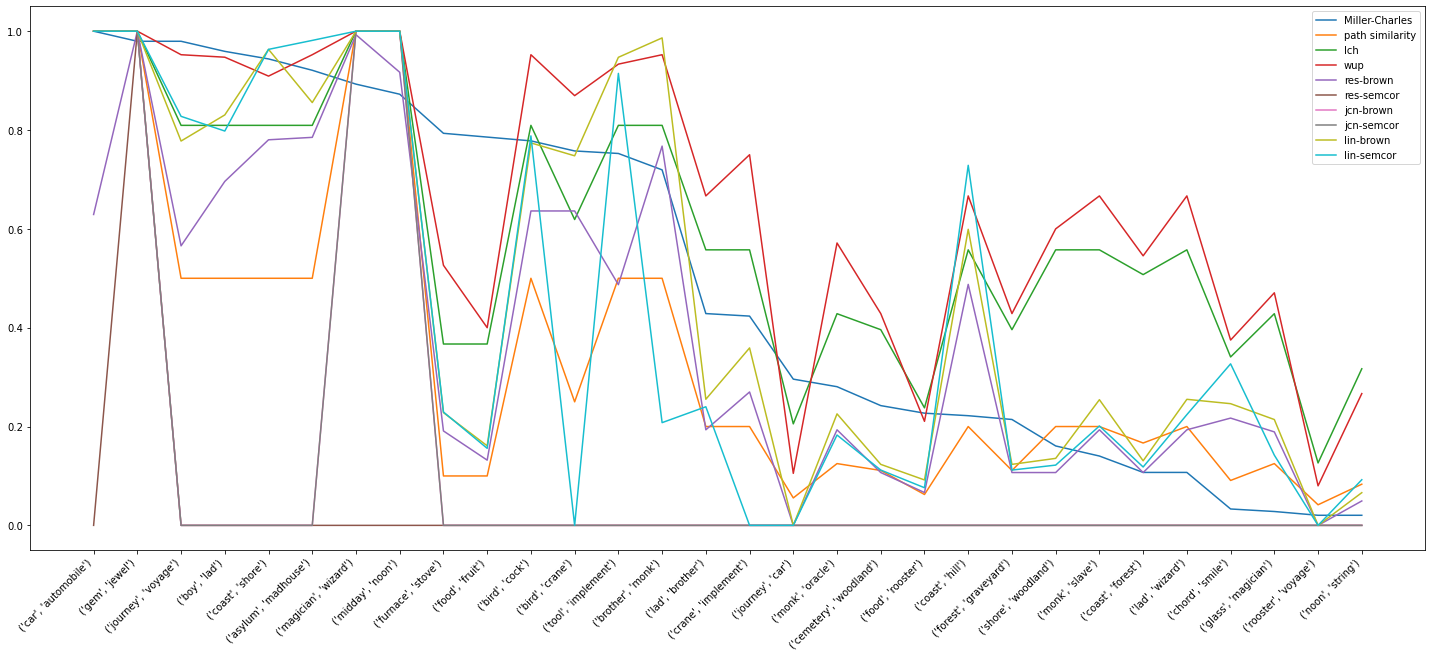

In [145]:
import matplotlib.pyplot as plt

ax = df_final.plot(figsize=(25, 10));
ax.set_xticks(df_final.index);
ax.set_xticklabels(df_final['pairs'], rotation = 45,  horizontalalignment = 'right');

In [146]:
df_final

,pairs,Miller-Charles,path similarity,lch,wup,res-brown,res-semcor,jcn-brown,jcn-semcor,lin-brown,lin-semcor
0,"(car, automobile)",1.000000,1.000000,1.000000,1.000000,0.629068,7.003586e-300,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
1,"(gem, jewel)",0.979592,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
2,"(journey, voyage)",0.979592,0.500000,0.809449,0.952381,0.565638,7.140787e-300,2.562806e-301,3.533885e-301,0.777715,8.276818e-01
3,"(boy, lad)",0.959184,0.500000,0.809449,0.947368,0.696031,6.741879e-300,2.917961e-301,2.928736e-301,0.830562,7.979405e-01
4,"(coast, shore)",0.943878,0.500000,0.809449,0.909091,0.780243,8.102198e-300,1.390583e-300,1.615407e-300,0.963217,9.632038e-01
5,"(asylum, madhouse)",0.920918,0.500000,0.809449,0.952381,0.785167,1.066715e-299,3.126296e-301,2.466303e-300,0.855584,9.813491e-01
6,"(magician, wizard)",0.892857,1.000000,1.000000,1.000000,0.992790,1.107261e-299,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
7,"(midday, noon)",0.872449,1.000000,1.000000,1.000000,0.916861,9.568535e-300,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
8,"(furnace, stove)",0.793367,0.100000,0.367002,0.526316,0.191076,2.493384e-300,6.409105e-302,5.969083e-302,0.228138,2.293847e-01
9,"(food, fruit)",0.785714,0.100000,0.367002,0.400000,0.131985,1.779817e-300,9.150387e-302,8.607225e-302,0.160984,1.558620e-01


In [147]:
# deleting jcn_brown, jcn_semcor and res_semcor

from functools import reduce

dfs = [df_mc, df_path_sim, df_lch_sim, df_wup_sim, df_rb_sim,
        df_lb_sim, df_ls_sim]

df_final = reduce(lambda left, right: pd.merge(left, right, on = 'pairs'), dfs)

df_final.columns = ['pairs', 'Miller-Charles', 'path similarity', 'lch', 'wup', 'res-brown',
                    'lin-brown', 'lin-semcor']

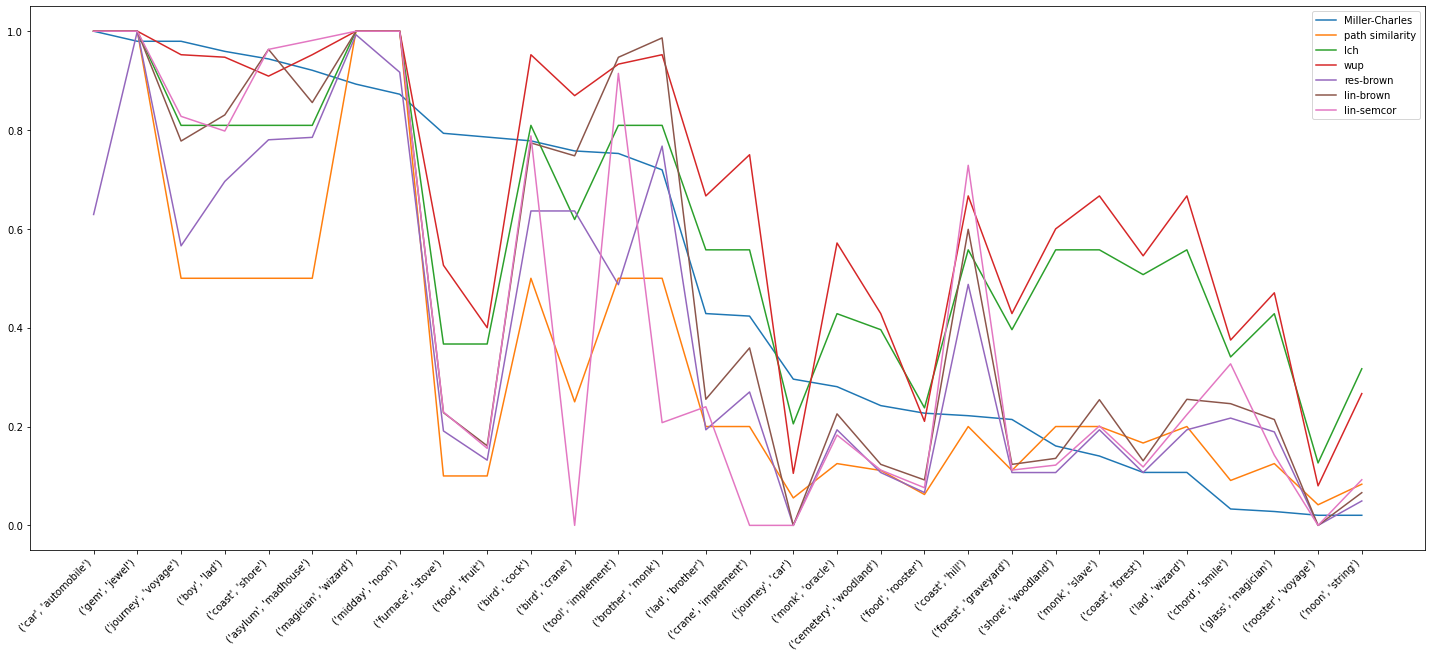

In [148]:
import matplotlib.pyplot as plt

ax = df_final.plot(figsize=(25, 10));
ax.set_xticks(df_final.index);
ax.set_xticklabels(df_final['pairs'], rotation = 45,  horizontalalignment = 'right');